## Biblioteca importadas

In [2]:

import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt




## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [3]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [4]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [5]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [6]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [7]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SJO

In [8]:
##nacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_nac.csv'
#dados7 = pd.read_csv(filename)

##internacional
#filename = r'C:\Users\vitor\OneDrive\Documentos\INSPER_JR\Decolagem_I\regressão\Passageiros pagos\sjo_int.csv'
#dados6 = pd.read_csv(filename)



## Variaveis macro economicas

#### Valor do barril de petróleo

In [9]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)

#### Cotação do dolar

In [15]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)
dolar = dolar.drop(["valor"], axis =1)


,Ano,dolar
0,2000,0.000000
1,2001,0.283438
2,2002,0.516534
3,2003,-0.184261
4,2004,-0.058498
5,2005,-0.178729
6,2006,-0.080582
7,2007,-0.233702
8,2008,0.473029
9,2009,-0.347376


#### Inflação do turismo no Brasil

In [10]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)

#### PIB do Brasil e dos Estados dos aeroportos 

In [11]:
filename = r'C:Dados macros\PIB_brasil_freq.xlsx'
pib = pd.read_excel(filename)

## Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [12]:
principal_cwb =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )


#### Correlação entre os dados pré selecionados 

In [13]:
principal_cwb.loc[principal_cwb["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_cwb = principal_cwb.loc[principal_cwb["Ano"]<2020]

principal_cwb.corr()


,Ano,Passageiros,Passageiros_freq,numero_de_passageiros,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
Ano,1.000000,-0.296982,-0.368920,0.825633,0.537493,0.498046,0.462911,-0.379601,-0.313397
Passageiros,-0.296982,1.000000,0.092457,-0.063254,0.159826,0.090478,-0.393514,-0.353917,0.498017
Passageiros_freq,-0.368920,0.092457,1.000000,-0.422203,-0.114829,-0.073021,-0.530997,-0.222893,0.431608
numero_de_passageiros,0.825633,-0.063254,-0.422203,1.000000,0.747097,0.757172,0.089808,-0.283610,-0.192897
Passageiros internacionais,0.537493,0.159826,-0.114829,0.747097,1.000000,0.769081,-0.233850,-0.354779,0.176821
Oil,0.498046,0.090478,-0.073021,0.757172,0.769081,1.000000,-0.336762,-0.422720,0.289631
dolar,0.462911,-0.393514,-0.530997,0.089808,-0.233850,-0.336762,1.000000,0.166638,-0.483029
inflacao,-0.379601,-0.353917,-0.222893,-0.283610,-0.354779,-0.422720,0.166638,1.000000,-0.353883
PIB REAL BRASIL,-0.313397,0.498017,0.431608,-0.192897,0.176821,0.289631,-0.483029,-0.353883,1.000000


#### Análise grafica

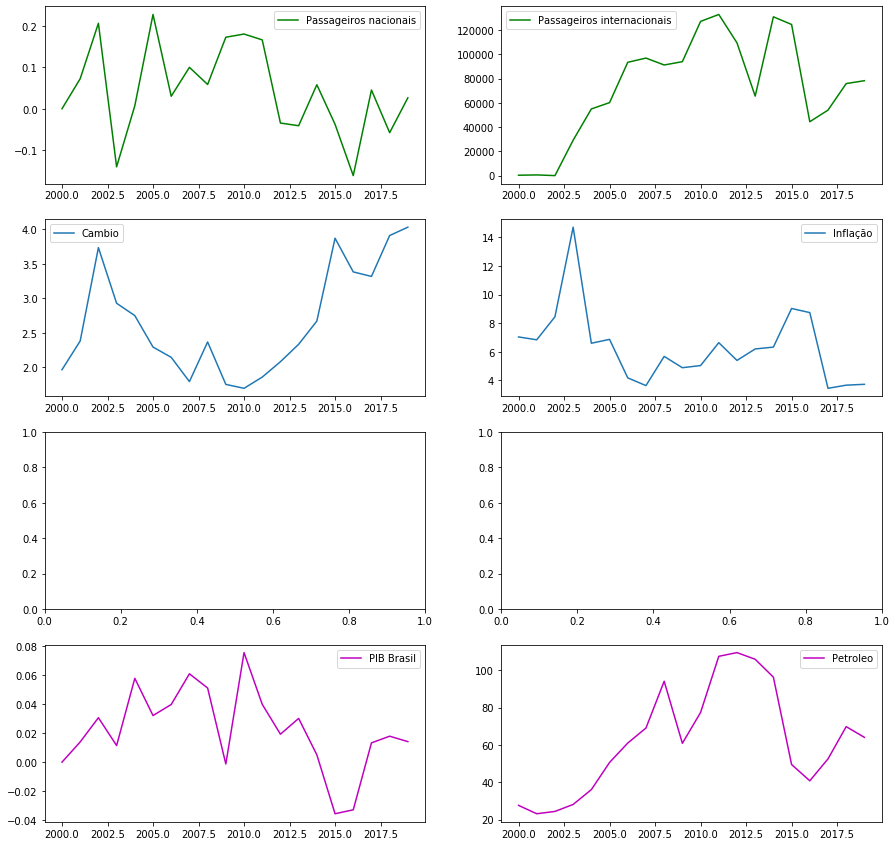

In [14]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_cwb["Ano"], principal_cwb["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_cwb["Ano"], principal_cwb["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[3,0].plot(principal_cwb["Ano"], principal_cwb["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

In [15]:
treino = principal_cwb.loc[principal_cwb["Ano"] < 2017]
teste = principal_cwb.loc[principal_cwb["Ano"] >= 2000]

In [17]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano", "numero_de_passageiros","Oil"],axis=1).copy()

In [18]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [-4.98812065e-01 -1.63304931e-03 -4.96795192e-02 -2.28832654e-02
  1.72120198e+00]
0.4190908701366786
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.08043747705890643


In [20]:
principal_cwb

,Ano,Passageiros,Passageiros_freq,numero_de_passageiros,Passageiros internacionais,Oil,dolar,inflacao,PIB REAL BRASIL
0,2000,0.000000,0.072882,2981167,329,27.60,1.9678,7.04,0.000000
1,2001,0.072882,0.207066,3198439,581,23.12,2.3840,6.84,0.013899
2,2002,0.207066,-0.140686,3860727,20,24.36,3.7342,8.45,0.030535
3,2003,-0.140686,0.007247,3317577,29211,28.10,2.9293,14.71,0.011408
4,2004,0.007247,0.228481,3341621,54979,36.05,2.7508,6.60,0.057600
5,2005,0.228481,0.030291,4105119,60198,50.59,2.2957,6.87,0.032021
6,2006,0.030291,0.100356,4229466,93446,61.00,2.1470,4.18,0.039620
7,2007,0.100356,0.058857,4653920,96927,69.04,1.7959,3.64,0.060699
8,2008,0.058857,0.173340,4927837,91231,94.10,2.3690,5.68,0.050942
9,2009,0.173340,0.181015,5782028,93952,60.86,1.7557,4.89,-0.001258


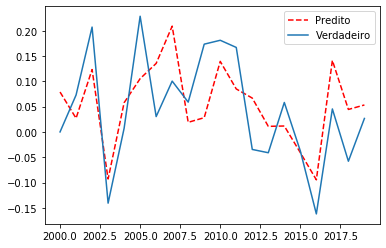

In [19]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_cwb["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [21]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [22]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [23]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.08009224432818128


In [24]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.08043747705890641


In [25]:
#ano_lista = np.arange(2017,2020,1)
#
#
#plt.plot(ano_lista,final_predictions ,'--r', label='Predito')
#plt.plot(ano_lista, y_test, label = 'Verdadeiro' )
#plt.legend()
#plt.show()

In [38]:
import statsmodels.api as sm

#define response variable
y = principal_cwb["Passageiros"].loc[principal_cwb["Ano"]<2020]

#define predictor variables
x = principal_cwb.drop(["Passageiros", "Passageiros internacionais","Ano", "numero_de_passageiros"],axis=1).loc[principal_cwb["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Passageiros   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     2.574
Date:                Fri, 18 Nov 2022   Prob (F-statistic):             0.0748
Time:                        12:32:26   Log-Likelihood:                 22.952
No. Observations:                  20   AIC:                            -33.90
Df Residuals:                      14   BIC:                            -27.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4227      0.178  

In [34]:
ypred = model.predict(x)




0     0.027580
1    -0.008861
2     0.043391
3    -0.053190
4     0.035748
5     0.074995
6     0.098002
7     0.163162
8     0.068536
9     0.023606
10    0.143551
11    0.128008
12    0.101005
13    0.068321
14    0.043055
15   -0.060779
16   -0.093943
17    0.059709
18    0.012259
19    0.008570
dtype: float64

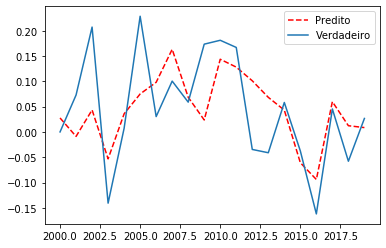

In [37]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_cwb["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()

## Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [ ]:
principal_igu =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [ ]:
principal_igu.loc[principal_igu["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_igu = principal_igu.loc[principal_igu["Ano"]<2020]

principal_igu.corr()
principal_igu

##### Análise grafica

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_igu["Ano"], principal_igu["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_igu["Ano"], principal_igu["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_igu["Ano"], principal_igu["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_igu["Ano"], principal_igu["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL PR"],"c", label = 'PIB PR' )
#ax[2,0].legend()
#
#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()
#
ax[3,0].plot(principal_igu["Ano"], principal_igu["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_igu["Ano"], principal_igu["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

In [ ]:
treino = principal_igu.loc[principal_igu["Ano"] < 2017]
teste = principal_igu.loc[principal_igu["Ano"] >= 2000]

In [ ]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()

In [ ]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


In [ ]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_igu["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [ ]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

In [ ]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [ ]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

In [ ]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

In [ ]:
import statsmodels.api as sm

#define response variable
y = principal_igu["Passageiros"].loc[principal_igu["Ano"]<2020]

#define predictor variables
x = principal_igu.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_igu["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

## Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [ ]:
principal_nvt =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [ ]:
 
principal_nvt = principal_nvt.loc[principal_nvt["Ano"]<2020]

principal_nvt.corr()
principal_nvt

##### Análise grafica

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_nvt["Ano"], principal_nvt["Passageiros"],"g", label='Passageiros nacionais')
ax[0,0].legend()

ax[0,1].plot(principal_nvt["Ano"], principal_nvt["Passageiros internacionais"],"g", label = 'Passageiros internacionais' )
ax[0,1].legend()


ax[1,0].plot(principal_nvt["Ano"], principal_nvt["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_nvt["Ano"], principal_nvt["inflacao"], label='Inflação')
ax[1,1].legend()

#ax[2,0].plot(principal["Ano"], principal["PIB REAL SC"],"c", label = 'PIB SC' )
#ax[2,0].legend()
#
#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP ' )
#ax[2,1].legend()

ax[3,0].plot(principal_nvt["Ano"], principal_nvt["PIB REAL BRASIL"],"m", label = 'PIB Brasil' )
ax[3,0].legend()

ax[3,1].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[3,1].legend()

plt.show()

In [ ]:
treino = principal_nvt.loc[principal_nvt["Ano"] < 2017]
teste = principal_nvt.loc[principal_nvt["Ano"] >= 2000]

In [ ]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).copy()

In [ ]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


In [ ]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_nvt["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [ ]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

In [ ]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [ ]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

In [ ]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

In [ ]:
import statsmodels.api as sm

#define response variable
y = principal_nvt["Passageiros"].loc[principal_nvt["Ano"]<2020]

#define predictor variables
x = principal_nvt.drop(["Passageiros", "Passageiros internacionais","Ano"],axis=1).loc[principal_nvt["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

## Palmas

##### juntando os pontos macros e uma unico DataFrame

In [ ]:
principal_pmw =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [ ]:
principal_pmw.loc[principal_pmw["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_pmw= principal_pmw.loc[principal_pmw["Ano"]<2020]
principal_pmw.corr()

##### Análise grafica

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal_pmw["Ano"], principal_pmw["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
#ax[0,1].legend()

ax[1,0].plot(principal_pmw["Ano"], principal_pmw["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_pmw["Ano"], principal_pmw["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal_pmw["Ano"], principal_pmw["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[3,0].plot(principal_nvt["Ano"], principal_nvt["Oil"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()#

In [ ]:
treino = principal_pmw.loc[principal_pmw["Ano"] < 2017]
teste = principal_pmw.loc[principal_pmw["Ano"] >= 2000]

In [ ]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Ano"],axis=1).copy()

In [ ]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


In [ ]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_pmw["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [ ]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

In [ ]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [ ]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

In [ ]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

In [ ]:
import statsmodels.api as sm

#define response variable
y = principal_pmw["Passageiros"].loc[principal_pmw["Ano"]<2020]

#define predictor variables
x = principal_pmw.drop(["Passageiros", "Ano"],axis=1).loc[principal_pmw["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

## São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [ ]:
principal_slz =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [ ]:
principal_slz.loc[principal_slz["Ano"] == 2019, "Passageiros_freq"] = 0 
principal_slz= principal_slz.loc[principal_slz["Ano"]<2020]
principal_slz.corr()
principal_slz

##### Análise grafica

In [ ]:
fig, ax = plt.subplots(4,2)

fig.set_size_inches(15,15)


ax[0,0].plot(principal_slz["Ano"], principal_slz["Passageiros"],"g", label='Passageiros')
ax[0,0].legend()

#ax[0,1].plot(principal["Ano"], principal["PIB REAL TO"],"g", label='PIB TO')
#ax[0,1].legend()

ax[1,0].plot(principal_slz["Ano"], principal_slz["dolar"], label = 'Cambio' )
ax[1,0].legend()

ax[1,1].plot(principal_slz["Ano"], principal_slz["inflacao"], label='Inflação')
ax[1,1].legend()

ax[2,0].plot(principal_slz["Ano"], principal_slz["PIB REAL BRASIL"],"c", label = 'PIB Brasil' )
ax[2,0].legend()

#ax[2,1].plot(principal["Ano"], principal["PIB REAL SP"],"c", label = 'PIB SP' )
#ax[2,1].legend()

ax[3,0].plot(principal_slz["Ano"], principal_slz["Oil"],"m", label='Petroleo')
ax[3,0].legend()



plt.show()#

In [ ]:
treino = principal_slz.loc[principal_slz["Ano"] < 2017]
teste = principal_slz.loc[principal_slz["Ano"] >= 2000]

In [ ]:
y_train= treino["Passageiros"].copy()
y_test= teste["Passageiros"].copy()

X_train = treino.drop(["Passageiros", "Ano"],axis=1).copy()
X_test = teste.drop(["Passageiros", "Ano"],axis=1).copy()

In [ ]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


print(f"Coeficiente da regressão linear: {reg.coef_}")
print(reg.intercept_)
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")


In [ ]:
ano_lista = np.arange(2000,2020,1)


plt.plot(ano_lista, YpredL,'--r', label='Predito')
plt.plot(ano_lista, principal_slz["Passageiros"], label = 'Verdadeiro' )
plt.legend()
plt.show()


In [ ]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

In [ ]:
y_pred_pipeline = clf_pipe.predict(X_train)

In [ ]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

In [ ]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

In [ ]:
import statsmodels.api as sm

#define response variable
y = principal_slz["Passageiros"].loc[principal_slz["Ano"]<2020]

#define predictor variables
x = principal_slz.drop(["Passageiros", "Ano"],axis=1).loc[principal_slz["Ano"]<2020]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

## Comparação de passageiros nos aeroportos analisados

In [ ]:
#plt.plot(cwb_nac["Ano"], cwb_nac["Passageiros"], label='Curitiba')
#plt.legend()
#
#plt.plot(igu_nac["Ano"], igu_nac["Passageiros"], label='Foz do Iguaçu')
#plt.legend()
##
#plt.plot(nvt_nac["Ano"], nvt_nac["Passageiros"], label='Navegantes')
#plt.legend()
##
#plt.plot(slz["Ano"], slz["Passageiros"], label='São Luiz')
#plt.legend()
##
#plt.plot(pmw["Ano"], pmw["Passageiros"], label='Palmas')
#plt.legend()
#
#plt.title("Voos Nacionais")
#plt.show()
#
#
#
#
#plt.plot(cwb_nac["Ano"], cwb_int["Passageiros internacionais"], label='Curitiba')
#plt.legend()
#
#plt.plot(igu_nac["Ano"], igu_int["Passageiros internacionais"], label='Foz do Iguaçu')
#plt.legend()
#
#plt.plot(nvt_nac["Ano"], nvt_int["Passageiros internacionais"], label='Navegantes')
#plt.legend()
#
#plt.title("Voos Internacionais")
#plt.show()